In [2]:
import random
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from Crypto.Util import number
import time
import sys, threading
from math import sqrt,floor

sys.setrecursionlimit(10**7)
threading.stack_size(2**27)




134217728

# Utility functions for RSA

In [3]:

# is prime
def is_prime(n):
    if n == 2:
        return True
    if n % 2 == 0 or n <= 1:
        return False
    for i in range(3, int(n**0.5)+1, 2):
        if n % i == 0:
            return False
    return True


def ConvertToInt(message_str):
  res = 0
  for i in range(len(message_str)):
    res = res * 256 + ord(message_str[i])
  return res

def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

def GCD(a, b):
  if b == 0:
    return a
  return GCD(b, a % b)

def ExtendedEuclid(a, b):
    if b == 0:
        return (1, 0)
    (x, y) = ExtendedEuclid(b, a % b)
    k = a // b
    return (y, x - k * y)

# this is an R2L recursive implementation that works for large integers
def PowMod(a, n, mod): 
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    else:
        b = PowMod(a, n // 2, mod)
        b = b * b % mod
        if n % 2 == 0:
          return b
        else:
          return b * a % mod

def InvertModulo(a, n):
    (b, x) = ExtendedEuclid(a, n)
    if b < 0:
        b = (b % n + n) % n # we don't want -ve integers
    return b



# REQ1) RSA functions

In [4]:

def RSA(n_bits):
    p = number.getPrime(n_bits // 2)
    q = number.getPrime(n_bits // 2)
    while p == q:
        q = number.getPrime(n_bits // 2)
    n=p*q
    phi=(p-1)*(q-1)
    e=random.randint(2,phi)
    while sp.gcd(e,phi) != 1:
        e=random.randint(2,phi) 

    d=sp.mod_inverse(e,phi)
    pu=e,n
    pr=d,n
    return pu,pr

def Encrypt(message,pu):
    e,n=pu
    return PowMod(message,e,n)

def Decrypt(cipher,pr):
    d,n=pr
    return PowMod(cipher,d,n)
    

# REQ3) RSA     encryption time - nbits

In [5]:
#key generation loop for req3

message="A"
message_int=ConvertToInt(message)

#make x linspace of range 1 to 1024
low=8
end=512
x=np.linspace(low,end,end-low+1)
#print(x[:200])
y=[]

keys=[]
for i in x:
    (e,n),(d,n)=RSA(int(i))
    keys.append((e,n))
    
   


In [6]:
counter=0

for i in x:
    elapsed_time=0
    (e,n)=keys[counter]
    for j in range(100):
        
        st=time.time()
        cipher=Encrypt(message_int,(e,n))
        et=time.time()
        elapsed_time+=(et-st)
    y.append(elapsed_time/100)
    counter+=1
    

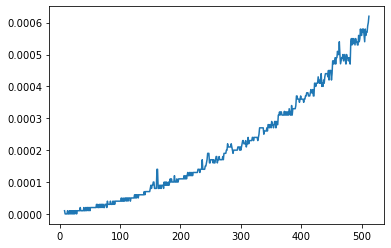

In [7]:
plt.plot(x, y)
plt.show()


# Req4

In [8]:
#break RSA  for req 4
def break_RSA(pu):
    e,n=pu
    #get p,q
    for i in range(2,n//2):
        if n%i==0:
            p=i
            q=n//i
            break
    


    return p,q

(pu,_)=RSA(32)
print(pu)
p,q=break_RSA(pu)
assert(p*q==pu[1])

(620255519, 2589414319)


In [9]:
#loop to generate keys
keys_to_break=[]

lower_range=8
upper_range=50
for i in range(lower_range,upper_range):
    (e,n),(d,n)=RSA(int(i))
    keys_to_break.append((e,n))

counter=0
time_array=[]
for i in range(lower_range,upper_range):
    time_taken=0
    #for k in range(1,2):
    st=time.time()
    p,q=break_RSA(keys_to_break[counter])
    et=time.time()
    time_taken=(et-st)
    time_array.append(time_taken)
    print(i,time_taken)
        
    counter+=1


    
 

8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0009992122650146484
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0009996891021728516
29 0.0010004043579101562
30 0.00099945068359375
31 0.0010018348693847656
32 0.003998279571533203
33 0.002998828887939453
34 0.007999897003173828
35 0.008000850677490234
36 0.014998912811279297
37 0.014999866485595703
38 0.030002355575561523
39 0.028015613555908203
40 0.06899785995483398
41 0.06200838088989258
42 0.14702796936035156
43 0.17100048065185547
44 0.3660738468170166
45 0.30408573150634766
46 0.5010507106781006
47 0.585176944732666
48 1.5316894054412842
49 1.3299951553344727


# req4 graph 

(42,)
(42,)


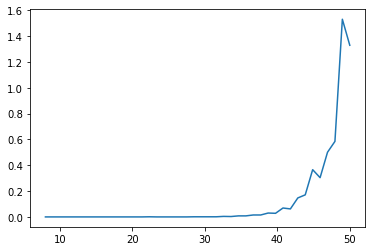

In [10]:

x_break=np.linspace(lower_range,upper_range,upper_range-lower_range)
print(x_break.shape)
print(np.array(time_array).shape)

plt.plot(x_break,time_array)
plt.show()